### '아파트 청약'기사 크롤링 함수
- 내용에 '아파트 청약' 키워드가 포함된 기사 크롤링
    - 방법: 각 연도별 100개씩+월별 균등하게 기사 수집
    - 기간: 2020~2024
    - 합계: 480개(연도별로 96개)
        - why 96개? 월별 8개씩 뽑힘

In [2]:
import urllib.parse
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import random

def generate_news_url(query: str, start: int, start_date: str, end_date: str) -> str:
    """네이버 뉴스 검색 URL 생성"""
    base_url = "https://search.naver.com/search.naver"
    params = {
        "where": "news",
        "query": query,
        "sm": "tab_opt",
        "sort": "0",  # 0: 관련도순 (무작위성 증가)
        "start": start,
        "pd": "3",  # 기간 설정 사용
        "ds": start_date,  # 시작일
        "de": end_date,  # 종료일
        "nso": f"so:r,p:from{start_date.replace('.', '')}to{end_date.replace('.', '')},a:all"
    }
    return base_url + "?" + urllib.parse.urlencode(params, quote_via=urllib.parse.quote)

def crawl_naver_news(query: str, year: int, max_articles: int = 100) -> list:
    """네이버 뉴스에서 특정 키워드와 연도별 기사 크롤링"""
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    articles = []
    start_date = f"{year}.01.01"
    end_date = f"{year}.12.31"

    while len(articles) < max_articles:
        start = random.randint(1, 1000)  # 무작위 시작 페이지
        try:
            search_url = generate_news_url(query, start, start_date, end_date)
            response = requests.get(search_url, headers=headers)
            response.raise_for_status()

            soup = BeautifulSoup(response.text, 'html.parser')
            news_links = [
                a['href'] for a in soup.select('a.info')
                if '네이버뉴스' in a.text and 'news.naver.com' in a['href']
            ]

            if not news_links:
                print(f"{year}년에는 더 이상 기사가 없습니다.")
                break

            for article_url in news_links:
                if len(articles) >= max_articles:
                    break

                try:
                    article_res = requests.get(article_url, headers=headers, timeout=5)
                    article_res.raise_for_status()
                    article_soup = BeautifulSoup(article_res.text, 'html.parser')

                    content_elem = article_soup.select_one('#newsct_article, #dic_area')
                    if not content_elem:
                        continue

                    content = content_elem.get_text(strip=True)
                    if "아파트 청약" not in content:
                        continue

                    title_elem = article_soup.select_one('#title_area')
                    date_elem = article_soup.select_one('.media_end_head_info_datestamp_time')

                    if title_elem and date_elem:
                        articles.append({
                            "title": title_elem.get_text(strip=True),
                            "date": date_elem['data-date-time'],
                            "content": content,
                            "url": article_url,
                            "year": year
                        })

                except Exception as e:
                    print(f"기사 처리 실패 ({article_url}): {str(e)}")

            time.sleep(random.uniform(1, 3))  # 무작위 대기 시간

        except Exception as e:
            print(f"페이지 처리 실패 ({search_url}): {str(e)}")
            time.sleep(random.uniform(5, 10))  # 오류 시 더 긴 대기 시간

    return articles

if __name__ == "__main__":
    query = "아파트 청약"

    print(f"{query} 관련 뉴스 크롤링 시작...")

    all_news_data = []

    for year in range(2020, 2025):  # 2020년부터 2024년까지 반복
        print(f"\n===== {year}년 크롤링 시작 =====")
        yearly_news_data = crawl_naver_news(query, year, max_articles=100)
        all_news_data.extend(yearly_news_data)
        print(f"{year}년 크롤링 완료: {len(yearly_news_data)}개의 기사 수집")

    print(f"\n총 {len(all_news_data)}개의 기사가 수집되었습니다.")

    # 결과 출력 및 저장
    df = pd.DataFrame(all_news_data)
    df.to_csv('202024_아파트청약_뉴스_연도별_크롤링.csv', index=False, encoding='utf-8-sig')

    print("크롤링 결과가 '2020_2024_아파트청약_뉴스_연도별_크롤링.csv' 파일로 저장되었습니다.")

아파트 청약 관련 뉴스 크롤링 시작...

===== 2020년 크롤링 시작 =====
2020년 크롤링 완료: 100개의 기사 수집

===== 2021년 크롤링 시작 =====
2021년 크롤링 완료: 100개의 기사 수집

===== 2022년 크롤링 시작 =====
2022년 크롤링 완료: 100개의 기사 수집

===== 2023년 크롤링 시작 =====
2023년에는 더 이상 기사가 없습니다.
2023년 크롤링 완료: 29개의 기사 수집

===== 2024년 크롤링 시작 =====
2024년에는 더 이상 기사가 없습니다.
2024년 크롤링 완료: 81개의 기사 수집

총 410개의 기사가 수집되었습니다.
크롤링 결과가 '2020_2024_아파트청약_뉴스_연도별_크롤링.csv' 파일로 저장되었습니다.


In [3]:
import urllib.parse
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import random

def generate_news_url(query: str, start: int, start_date: str, end_date: str) -> str:
    base_url = "https://search.naver.com/search.naver"
    params = {
        "where": "news",
        "query": query,
        "sm": "tab_pge",
        "sort": "0",
        "photo": "0",
        "field": "0",
        "pd": "3",
        "ds": start_date,
        "de": end_date,
        "cluster_rank": "0",
        "mynews": "0",
        "office_type": "0",
        "office_section_code": "0",
        "news_office_checked": "",
        "nso": f"so:r,p:from{start_date.replace('.', '')}to{end_date.replace('.', '')},a:all",
        "start": start
    }
    return base_url + "?" + urllib.parse.urlencode(params)

def crawl_naver_news(query: str, year: int, max_articles: int = 100) -> list:
    articles = []
    for month in range(1, 13):
        start_date = f"{year}.{month:02d}.01"
        end_date = f"{year}.{month:02d}.{28 if month == 2 else 30}"
        monthly_articles = crawl_monthly_news(query, start_date, end_date, max_articles // 12)
        articles.extend(monthly_articles)
        if len(articles) >= max_articles:
            break
    return articles[:max_articles]

def crawl_monthly_news(query: str, start_date: str, end_date: str, max_articles: int) -> list:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    articles = []
    start = 1
    while len(articles) < max_articles:
        try:
            search_url = generate_news_url(query, start, start_date, end_date)
            response = requests.get(search_url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')
            news_links = [a['href'] for a in soup.select('a.info') if '네이버뉴스' in a.text and 'news.naver.com' in a['href']]
            if not news_links:
                break
            for article_url in news_links:
                if len(articles) >= max_articles:
                    break
                article = process_article(article_url, headers)
                if article:
                    articles.append(article)
            start += 10
            time.sleep(random.uniform(1, 3))
        except Exception as e:
            print(f"페이지 처리 실패 ({search_url}): {str(e)}")
            time.sleep(random.uniform(5, 10))
    return articles

def process_article(article_url: str, headers: dict) -> dict:
    try:
        article_res = requests.get(article_url, headers=headers, timeout=5)
        article_res.raise_for_status()
        article_soup = BeautifulSoup(article_res.text, 'html.parser')
        content_elem = article_soup.select_one('#newsct_article, #dic_area')
        if not content_elem:
            return None
        content = content_elem.get_text(strip=True)
        if "아파트 청약" not in content:
            return None
        title_elem = article_soup.select_one('#title_area')
        date_elem = article_soup.select_one('.media_end_head_info_datestamp_time')
        if title_elem and date_elem:
            return {
                "title": title_elem.get_text(strip=True),
                "date": date_elem['data-date-time'],
                "content": content,
                "url": article_url
            }
    except Exception as e:
        print(f"기사 처리 실패 ({article_url}): {str(e)}")
    return None

if __name__ == "__main__":
    query = "아파트 청약"
    print(f"{query} 관련 뉴스 크롤링 시작...")
    all_news_data = []
    for year in range(2020, 2025):
        print(f"\n===== {year}년 크롤링 시작 =====")
        yearly_news_data = crawl_naver_news(query, year, max_articles=100)
        all_news_data.extend(yearly_news_data)
        print(f"{year}년 크롤링 완료: {len(yearly_news_data)}개의 기사 수집")
    print(f"\n총 {len(all_news_data)}개의 기사가 수집되었습니다.")
    df = pd.DataFrame(all_news_data)
    df.to_csv('2020_2024_아파트청약_뉴스_연도별_크롤링(final).csv', index=False, encoding='utf-8-sig')
    print("크롤링 결과가 '2020_2024_아파트청약_뉴스_연도별_크롤링(final).csv' 파일로 저장되었습니다.")

아파트 청약 관련 뉴스 크롤링 시작...

===== 2020년 크롤링 시작 =====
2020년 크롤링 완료: 96개의 기사 수집

===== 2021년 크롤링 시작 =====
2021년 크롤링 완료: 96개의 기사 수집

===== 2022년 크롤링 시작 =====
2022년 크롤링 완료: 96개의 기사 수집

===== 2023년 크롤링 시작 =====
2023년 크롤링 완료: 96개의 기사 수집

===== 2024년 크롤링 시작 =====
2024년 크롤링 완료: 96개의 기사 수집

총 480개의 기사가 수집되었습니다.
크롤링 결과가 '2020_2024_아파트청약_뉴스_연도별_크롤링(final).csv' 파일로 저장되었습니다.


In [4]:
import pandas as pd
df = pd.read_csv('/Users/han-yeeun/mid-project/src/Yeeun Han/2020_2024_아파트청약_뉴스_연도별_크롤링(final).csv', encoding='utf-8-sig')

In [5]:
df.head()

,title,date,content,url
0,높아진 청약벽...서울 가점제 30대 당첨자 23%,2020-01-29 17:32:03,작년 40대가 46%로 가장 많아[서울경제] 지난해 서울에서 청약 가점제를 통해 내...,https://n.news.naver.com/mnews/article/011/000...
1,쏟아지는 로또급 분양…마곡·위례·과천 ‘신규청약’ 주목,2020-01-30 12:11:09,[앵커]아파트 청약업무 이관으로 한달간 공백기를 가진 분양 시장이 2월부터 다시 시...,https://n.news.naver.com/mnews/article/374/000...
2,서울 신규 아파트 당첨자 40대 비중↑ 특공은 30대 많아,2020-01-29 15:41:02,지난해 서울 신규 아파트 가점제 당첨자 연령대가 40대국토교통부는 서울 아파트 청약...,https://n.news.naver.com/mnews/article/020/000...
3,[2월 아파트 분양] 아파트 청약 내달부터 `청약홈`서 하세요,2020-01-29 04:05:01,올해부터 적용되는 청약·대출규정 살펴보니주택소유여부·부양가족수…청약자격 실시간 확인...,https://n.news.naver.com/mnews/article/009/000...
4,30대가 서울 아파트 매입 1위 '큰손'…'청약 포기자'의 힘,2020-01-24 09:31:00,"작년 29%가 30대…청약 가점 낮아 당첨 어렵자 기존 아파트 매입성동구 36%, ...",https://n.news.naver.com/mnews/article/001/001...


In [6]:
df.tail()

,title,date,content,url
475,10억 아파트가 7억 됐다…올해 집값∙전셋값 하락률 1위 이 도시,2024-12-26 05:00:10,집값 급등의 그늘세종 시내 아파트 단지 모습. 연합뉴스올해 전국 17개 광역시도 가...,https://n.news.naver.com/mnews/article/025/000...
476,빌라 집주인도 내일부터 청약 '무주택자'…아파트 경쟁률 뛴다,2024-12-17 07:39:10,수도권 85㎡·공시가 5억원 이하는 무주택 간주빌라가 밀집한 서울 강서구 화곡동 전...,https://n.news.naver.com/mnews/article/015/000...
477,탄핵 정국에 '얼죽신' 열풍 여전…서울 아파트 청약 불패,2024-12-19 06:00:00,올해 국민평형 전용 84㎡ 분양가 전년 대비 6억 이상 올라분양가 상승·주택 공급 ...,https://n.news.naver.com/mnews/article/003/001...
478,"""로또 확률에 高분양가""…청약통장 한달새 11만명 깼다",2024-12-17 17:39:16,사라진 '청약 메리트'…가입자 29개월째 감소세점수 낮은 5년미만 가입자 이탈↑소득...,https://n.news.naver.com/mnews/article/015/000...
479,오늘부터 '시세 8억' 빌라도 청약 무주택 인정…시장 회복은 글쎄,2024-12-18 11:53:01,"수도권 면적 85㎡, 공시가격 5억원 이하면 무주택 인정""아파트 청약 시 무주택자 ...",https://n.news.naver.com/mnews/article/003/001...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    480 non-null    object
 1   date     480 non-null    object
 2   content  480 non-null    object
 3   url      480 non-null    object
dtypes: object(4)
memory usage: 15.1+ KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

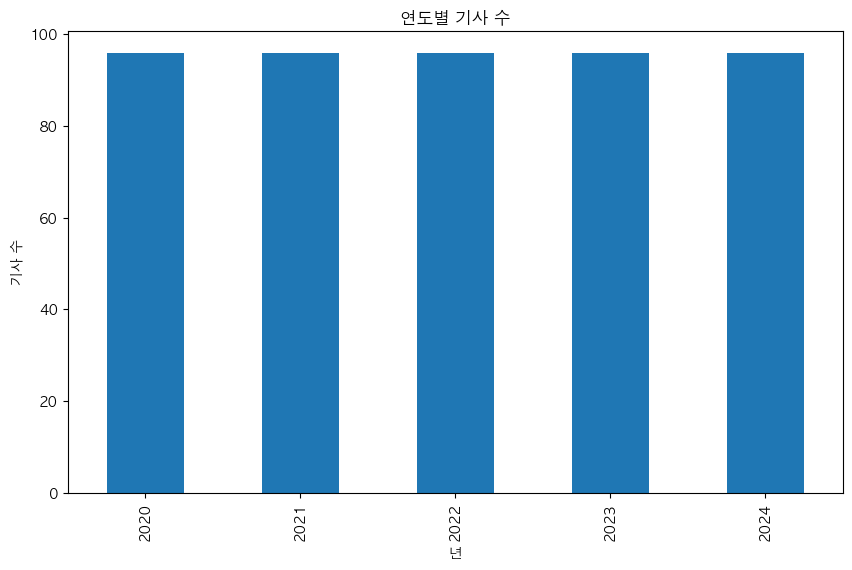

In [11]:
# 1. 시간적 분석
df['date'] = pd.to_datetime(df['date'])
df['년'] = df['date'].dt.year
df['월'] = df['date'].dt.month

# 연도별 기사 수
yearly_counts = df['년'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('연도별 기사 수')
plt.xlabel('년')
plt.ylabel('기사 수')
plt.show()

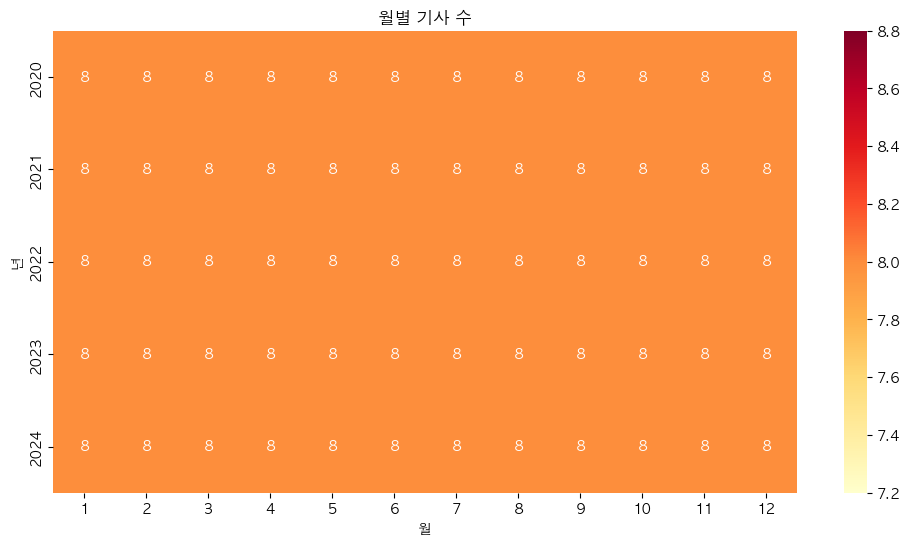

In [12]:
# 월별 기사 수
monthly_counts = df.groupby(['년', '월']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_counts, annot=True, fmt='d', cmap='YlOrRd')
plt.title('월별 기사 수')
plt.show()